In [65]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data = pd.read_csv(r"c:\Users\Computec\Documents\Graduation Project\AI x Space\meteorite-landings.csv")
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [67]:
data.drop(columns=['name', 'id'], inplace=True)

In [68]:
print(data.shape)
print(data.isnull().sum())

(45716, 8)
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64


In [69]:
mass_mean = int(data['mass'].mean())
data['mass'].fillna(mass_mean, inplace=True)


C:\Users\Computec\AppData\Local\Temp\ipykernel_12612\3392760147.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [70]:
year_mode = data['year'].mode()[0]
data['year'].fillna(year_mode, inplace=True)

C:\Users\Computec\AppData\Local\Temp\ipykernel_12612\2816801264.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [71]:
data.dropna(subset=['reclat', 'reclong', 'GeoLocation'], inplace=True)

In [72]:
duplicates = data[data.duplicated()]
duplicates.sum()

nametype       ValidValidValidValidValidValidValidValidValidV...
recclass       L6H5H5H5H5H5H6H5H5H5H5H5H5L3.5H5H5H5H6H5H6H5H5...
mass                                                    517310.7
fall           FoundFoundFoundFoundFoundFoundFoundFoundFoundF...
year                                                   4131034.0
reclat                                            -121060.255013
reclong                                            198419.710386
GeoLocation    (19.802520, 57.321370)(-76.716670, 159.666670)...
dtype: object

In [73]:
#Detecting outliers:
Q1 = data['mass'].quantile(0.25)
Q3 = data['mass'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['mass'] < lower_bound) | (data['mass'] > upper_bound)]
print(f"Number of outliers in mass: {outliers.shape[0]}")
print(outliers[['mass']].head())

Number of outliers in mass: 6167
       mass
1     720.0
2  107000.0
3    1914.0
4     780.0
5    4239.0


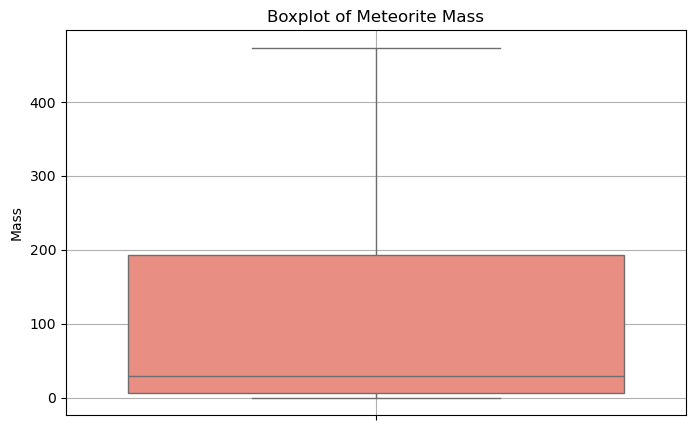

In [94]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data, y='mass', color='salmon')
plt.title('Boxplot of Meteorite Mass')
plt.ylabel('Mass')
plt.grid(True)
plt.show()

In [74]:
#handling outliers by clipping :
data['mass'] = data['mass'].clip(lower=lower_bound, upper=upper_bound)

In [75]:
#defining how many types of classes we have: 
unique_recclass_count = data['recclass'].nunique()
print(f"Number of unique recclass values: {unique_recclass_count}")

Number of unique recclass values: 427


In [76]:
data.shape

(38401, 8)

In [77]:
#Frequency-based label encoding + grouping:
#Encoding the ' recclass ' column by assigning the top 20 most frequent recclass values integers codes starting from 1:
# the rest of the 427 classes will be ' others '
top_classes = data['recclass'].value_counts().nlargest(20).index
class_mapping = {recclass: i+1 for i, recclass in enumerate(top_classes)}
data['recclass_encoded'] = data['recclass'].apply(lambda x: class_mapping.get(x, 21))
print(top_classes)
print(class_mapping)

Index(['L6', 'H5', 'H6', 'H4', 'L5', 'LL5', 'LL6', 'L4', 'H4/5', 'CM2', 'H3',
       'CO3', 'Iron, IIIAB', 'L3', 'LL', 'Ureilite', 'E3', 'LL4', 'CV3',
       'Howardite'],
      dtype='object', name='recclass')
{'L6': 1, 'H5': 2, 'H6': 3, 'H4': 4, 'L5': 5, 'LL5': 6, 'LL6': 7, 'L4': 8, 'H4/5': 9, 'CM2': 10, 'H3': 11, 'CO3': 12, 'Iron, IIIAB': 13, 'L3': 14, 'LL': 15, 'Ureilite': 16, 'E3': 17, 'LL4': 18, 'CV3': 19, 'Howardite': 20}


In [78]:
#binary encoding for fell / found :
data['fall_encoded'] = data['fall'].map({'Fell': 1, 'Found': 0})

In [79]:
#binary encoding for name type
data['nametype'].value_counts()
data['nametype_encoded'] = data['nametype'].map({'Valid': 1, 'Relict': 0})

In [80]:

print(data.dtypes)

nametype             object
recclass             object
mass                float64
fall                 object
year                float64
reclat              float64
reclong             float64
GeoLocation          object
recclass_encoded      int64
fall_encoded          int64
nametype_encoded      int64
dtype: object


In [81]:
correlation_matrix = data[['mass', 'recclass_encoded', 'fall_encoded', 'nametype_encoded', 'year', 'reclat', 'reclong']].corr()
print(correlation_matrix['mass'].sort_values(ascending=False))

mass                1.000000
reclat              0.498073
fall_encoded        0.282719
recclass_encoded    0.176426
nametype_encoded   -0.049491
year               -0.248811
reclong            -0.286999
Name: mass, dtype: float64


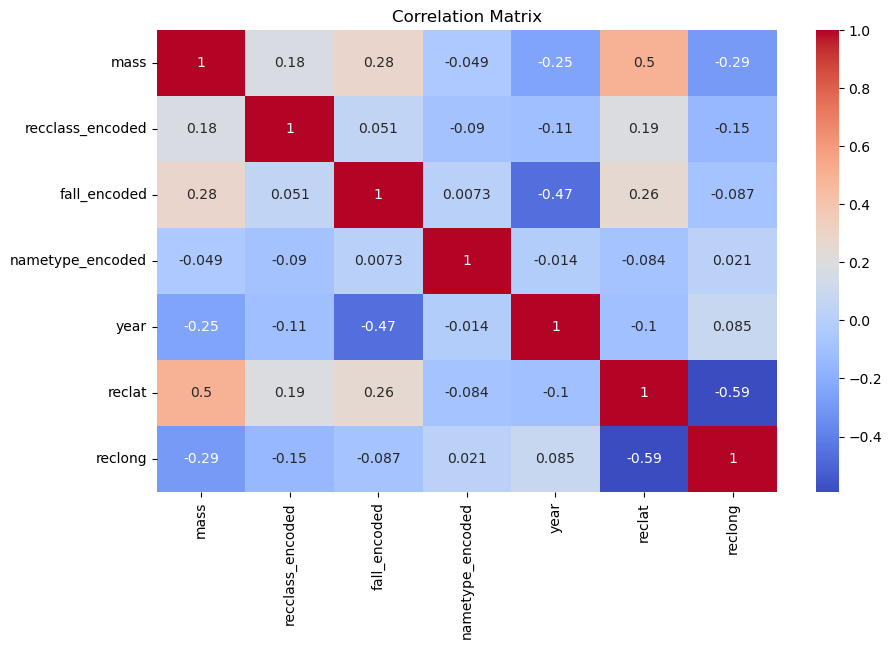

In [82]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

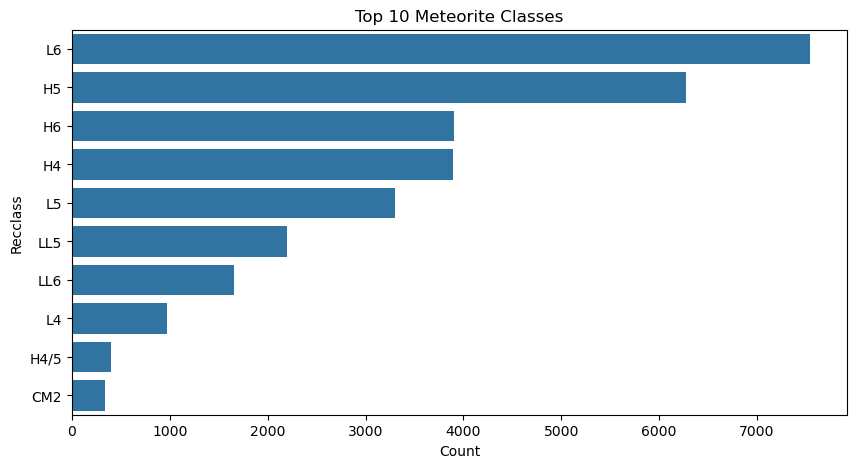

In [83]:
top_classes = data['recclass'].value_counts().nlargest(10).index
plt.figure(figsize=(10,5))
sns.countplot(y='recclass', data=data[data['recclass'].isin(top_classes)], order=top_classes)
plt.title('Top 10 Meteorite Classes')
plt.xlabel('Count')
plt.ylabel('Recclass')
plt.show()

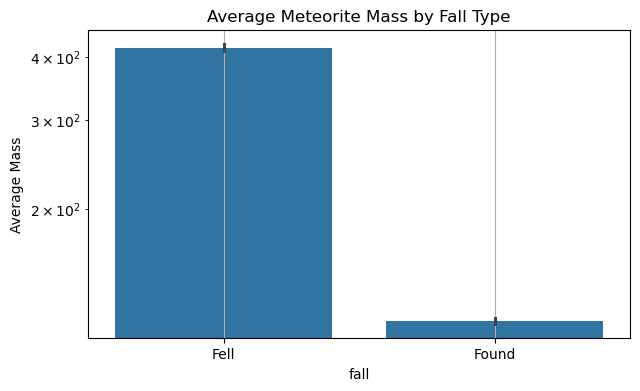

In [87]:
plt.figure(figsize=(7,4))
sns.barplot(x='fall', y='mass', data=data, estimator=np.mean)
plt.title('Average Meteorite Mass by Fall Type')
plt.ylabel('Average Mass')
plt.yscale('log')
plt.grid(True)
plt.show()


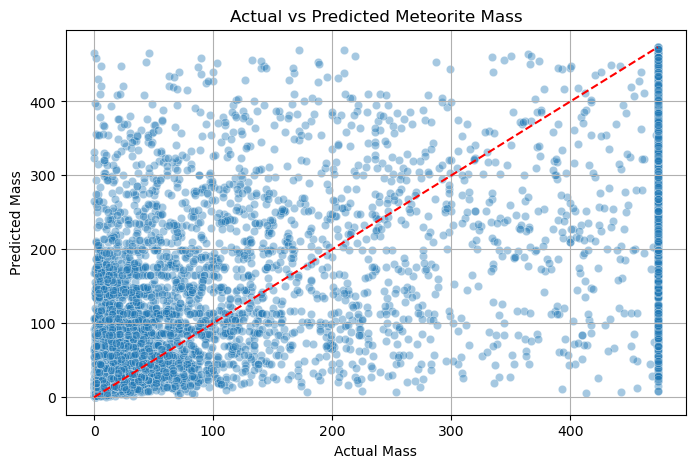

In [85]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_rf , alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # perfect prediction line
plt.xlabel('Actual Mass')
plt.ylabel('Predicted Mass')
plt.title('Actual vs Predicted Meteorite Mass')
plt.grid(True)
plt.show()

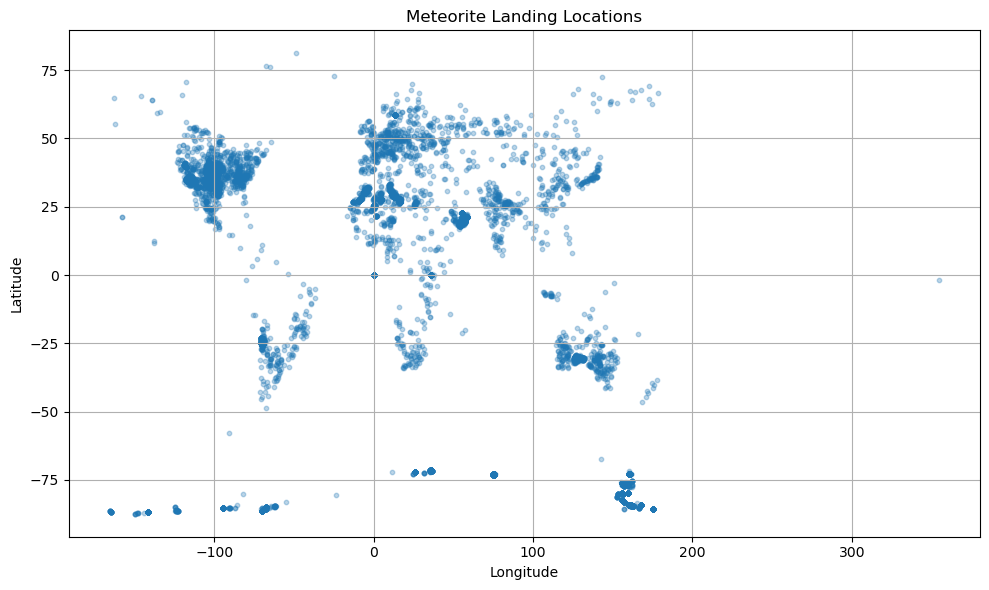

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(data['reclong'], data['reclat'], alpha=0.3, s=10)
plt.title('Meteorite Landing Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


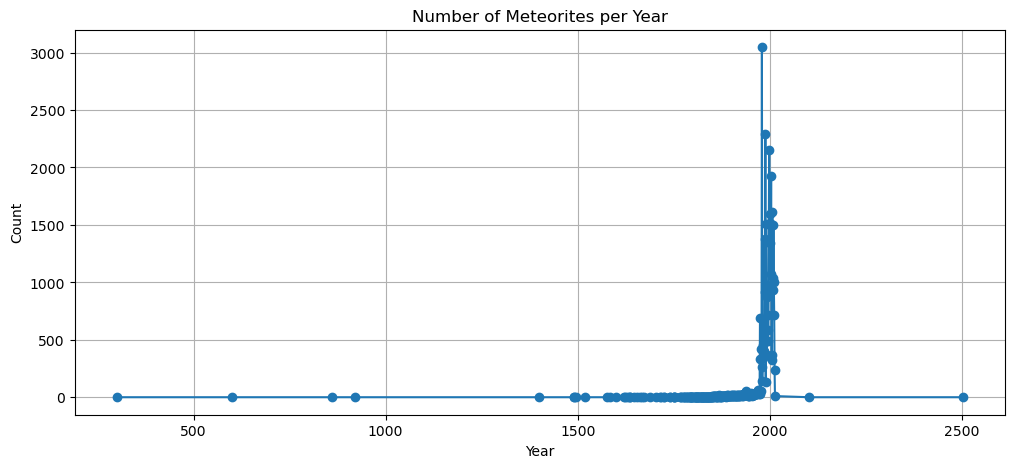

In [91]:
year_counts = data['year'].value_counts().sort_index()
plt.figure(figsize=(12,5))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title('Number of Meteorites per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()


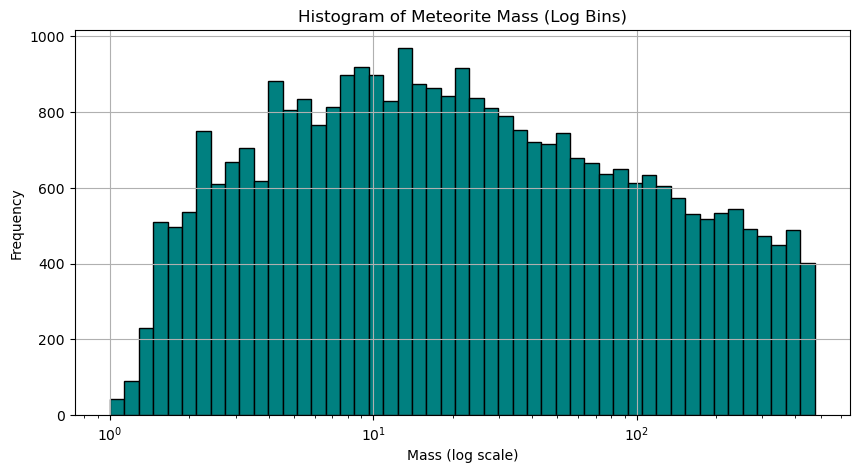

In [89]:
plt.figure(figsize=(10,5))
bins = np.logspace(np.log10(data['mass'].min()+1), np.log10(data['mass'].max()+1), 50)
plt.hist(data['mass']+1, bins=bins, color='teal', edgecolor='black')
plt.xscale('log')
plt.title('Histogram of Meteorite Mass (Log Bins)')
plt.xlabel('Mass (log scale)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


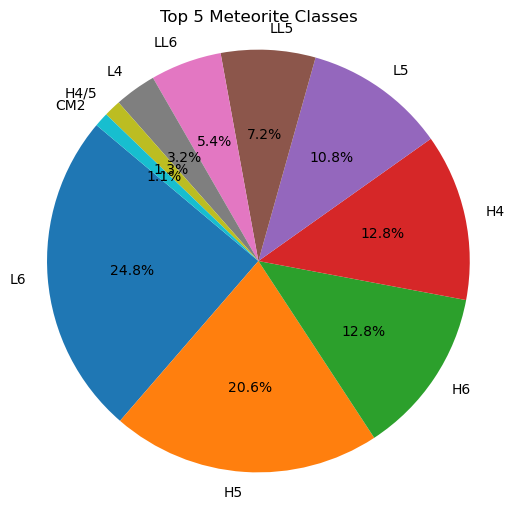

In [90]:
top5_classes = data['recclass'].value_counts().nlargest(10)
plt.figure(figsize=(6,6))
plt.pie(top5_classes, labels=top5_classes.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Meteorite Classes')
plt.axis('equal')
plt.show()


In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


X = data[['recclass_encoded', 'fall_encoded', 'nametype_encoded', 'year', 'reclat', 'reclong']]
y = data['mass']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=30, max_features='log2')
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")


Random Forest MAE: 78.59
Random Forest RMSE: 120.79
Random Forest R² Score: 0.52
